# Demo: Additive Gaussian processes under monotonicity constraints in 5D

In this notebook, we propose a demo example of the implementation of an additive Gaussian process (GP) under monotonicity constraints. The model is constructed via the MaxMod algorithm proposed in [1]

[1] A. F. López-Lopera, F. Bachoc and O. Roustant (2022). *High-dimensional additive Gaussian processes under monotonicity constraints*, in NeurIPS. URL: https://arxiv.org/abs/2205.08528.

In [1]:
# loading useful libraries
library("lineqGPR")
require("DiceDesign")
library("plot3D")
library("viridis")

rm(list=ls())
options(warn=-1)

Le chargement a nécessité le package : broom

Le chargement a nécessité le package : nloptr

Le chargement a nécessité le package : purrr

Le chargement a nécessité le package : DiceDesign

Le chargement a nécessité le package : viridisLite



In [2]:
# Synthetic data: monotonic function
modatan <- function(x, a) return(atan(a*x))
targetFun <- function(x, d) {
  y <- 0
  a <- (1-(1:d)/(d+1))*5
  for (k in 1:d)
    y <- y + modatan(x[, k], a[k])
  return(y)
}
D <- 5 # number of active + inactive input variables
d <- 2 # number of active input variables

In [3]:
# building DoE in dimension D via Latin hypercube sampling (LHS)
nbtrain <- 20*D
xdesign <- lhsDesign(nbtrain, D, seed = 8)$design
xdesign <- maximinSA_LHS(xdesign)$design
ydesign <- targetFun(xdesign, d)

# building a DoE for assessing the model
ntest <- 80*D
xtest <- lhsDesign(ntest, D, seed = 8)$design
xtest <- maximinSA_LHS(xtest)$design
ydesign <- targetFun(xdesign, d)

In [4]:
# initializing a 1D GP model with only two knots 
model <-  create(class = 'lineqAGP',
                 x = xdesign, y = ydesign,
                 constrType = rep("monotonicity", D), m = 5)
for (k in 1:D) 
  model$kernParam[[k]]$par <- c(1, 2)
model$localParam$sampler <- "HMC"
model$nugget <- 1e-5
model$varnoise <- 0.05*sd(ydesign)^2 

In [5]:
# updating the model according to the MaxMod algorithm
model <- AdditiveMaxMod(model,
                        xtest,
                        tol = 1e-4,
                        max_iter = 9,
                        reward_new_knot = 1e-12,
                        reward_new_dim = 1e-12,
                        print_iter = TRUE,
                        nClusters = 5,
                        save_history = TRUE)

message("\nNumber of active dimensions: ", d)
message("Number of actived dimensions via MaxMod: ", model$d, "\n")
idxAdd <- unique(model$MaxMod$optDecision)

                    dim 1    dim 2    dim 3    dim 4    dim 5
MaxMod criterion 2.448331 2.437327 2.357692 2.358788 2.359181
knot's position       NaN      NaN      NaN      NaN      NaN
decision         1.000000 0.000000 0.000000 0.000000 0.000000


Iter 1 - dimension 1 added as d = 1 (Relative MaxMod criterion = Inf)



                     dim 1      dim 2        dim 3       dim 4       dim 5
MaxMod criterion 0.0185221 0.09514709 7.816178e-07 0.000228694 3.33336e-07
knot's position  0.4536204        NaN          NaN         NaN         NaN
decision         0.0000000 1.00000000 0.000000e+00 0.000000000 0.00000e+00


Iter 2 - dimension 2 added as d = 2 (Relative MaxMod criterion = 0.0388620132138903)



                      dim 1       dim 2       dim 3        dim 4        dim 5
MaxMod criterion 0.01284502 0.002781626 3.08527e-05 9.658595e-05 1.682297e-05
knot's position  0.45093261 0.482013378         NaN          NaN          NaN
decision         1.00000000 0.000000000 0.00000e+00 0.000000e+00 0.000000e+00


Iter 3 - New knot added: d = 1 (Relative MaxMod criterion = 0.00500979063279321)



                       dim 1       dim 2 dim 3       dim 4        dim 5
MaxMod criterion 0.001025338 0.003043271 1e-12 6.84901e-08 1.049222e-05
knot's position  0.247637310 0.495534342   NaN         NaN          NaN
decision         0.000000000 1.000000000 0e+00 0.00000e+00 0.000000e+00


Iter 4 - New knot added: d = 2 (Relative MaxMod criterion = 0.00119828405918846)



                        dim 1        dim 2        dim 3 dim 4        dim 5
MaxMod criterion 0.0007840616 0.0001091325 1.452465e-07 1e-12 1.768162e-06
knot's position  0.2480652184 0.3004748339          NaN   NaN          NaN
decision         1.0000000000 0.0000000000 0.000000e+00 0e+00 0.000000e+00


Iter 5 - New knot added: d = 1 (Relative MaxMod criterion = 0.000307308813132068)



                        dim 1        dim 2 dim 3 dim 4        dim 5
MaxMod criterion 0.0002744335 9.018852e-05 1e-12 1e-12 1.417772e-07
knot's position  0.2008877560 7.441185e-01   NaN   NaN          NaN
decision         1.0000000000 0.000000e+00 0e+00 0e+00 0.000000e+00


Iter 6 - New knot added: d = 1 (Relative MaxMod criterion = 0.000108210590564345)



                        dim 1        dim 2 dim 3 dim 4 dim 5
MaxMod criterion 0.0003845454 0.0001167092 1e-12 1e-12 1e-12
knot's position  0.7165147406 0.2295355872   NaN   NaN   NaN
decision         1.0000000000 0.0000000000 0e+00 0e+00 0e+00


Iter 7 - New knot added: d = 1 (Relative MaxMod criterion = 0.000153010411122157)



                        dim 1        dim 2 dim 3 dim 4 dim 5
MaxMod criterion 0.0003608281 0.0005147519 1e-12 1e-12 1e-12
knot's position  0.2126859547 0.8233386308   NaN   NaN   NaN
decision         0.0000000000 1.0000000000 0e+00 0e+00 0e+00


Iter 8 - New knot added: d = 2 (Relative MaxMod criterion = 0.000202593973860192)



                        dim 1       dim 2        dim 3        dim 4       dim 5
MaxMod criterion 3.286401e-05 0.000153356 0.0002114869 0.0002119877 0.000211589
knot's position  3.529104e-01 0.307511721          NaN          NaN         NaN
decision         0.000000e+00 0.000000000 0.0000000000 1.0000000000 0.000000000


Iter 9 - dimension 4 added as d = 3 (Relative MaxMod criterion = 8.27783917536068e-05)

The sequential algorithm converged


Number of active dimensions: 2

Number of actived dimensions via MaxMod: 2




In [6]:
# evaluating the model using an equispaced grid of points
ntest <- 10
xtestGrid  <- as.matrix(expand.grid(seq(0, 1, length = ntest), seq(0, 1, length = ntest)))

pred <- predict(model, xtestGrid)
model$localParam$sampler <- "HMC"
sim.model <- simulate(model, nsim = 1e2, xtest = xtestGrid)

u <- expand.grid(model$ulist[[1]], model$ulist[[2]])
pred_Knots <- predict(model, as.matrix(u))
PhiAllknots.test <- cbind(pred_Knots$Phi.test[[1]][rep(1:model$localParam$m[1], times = model$localParam$m[2]), ],
                          pred_Knots$Phi.test[[2]][rep(1:model$localParam$m[2], each = model$localParam$m[1]), ])

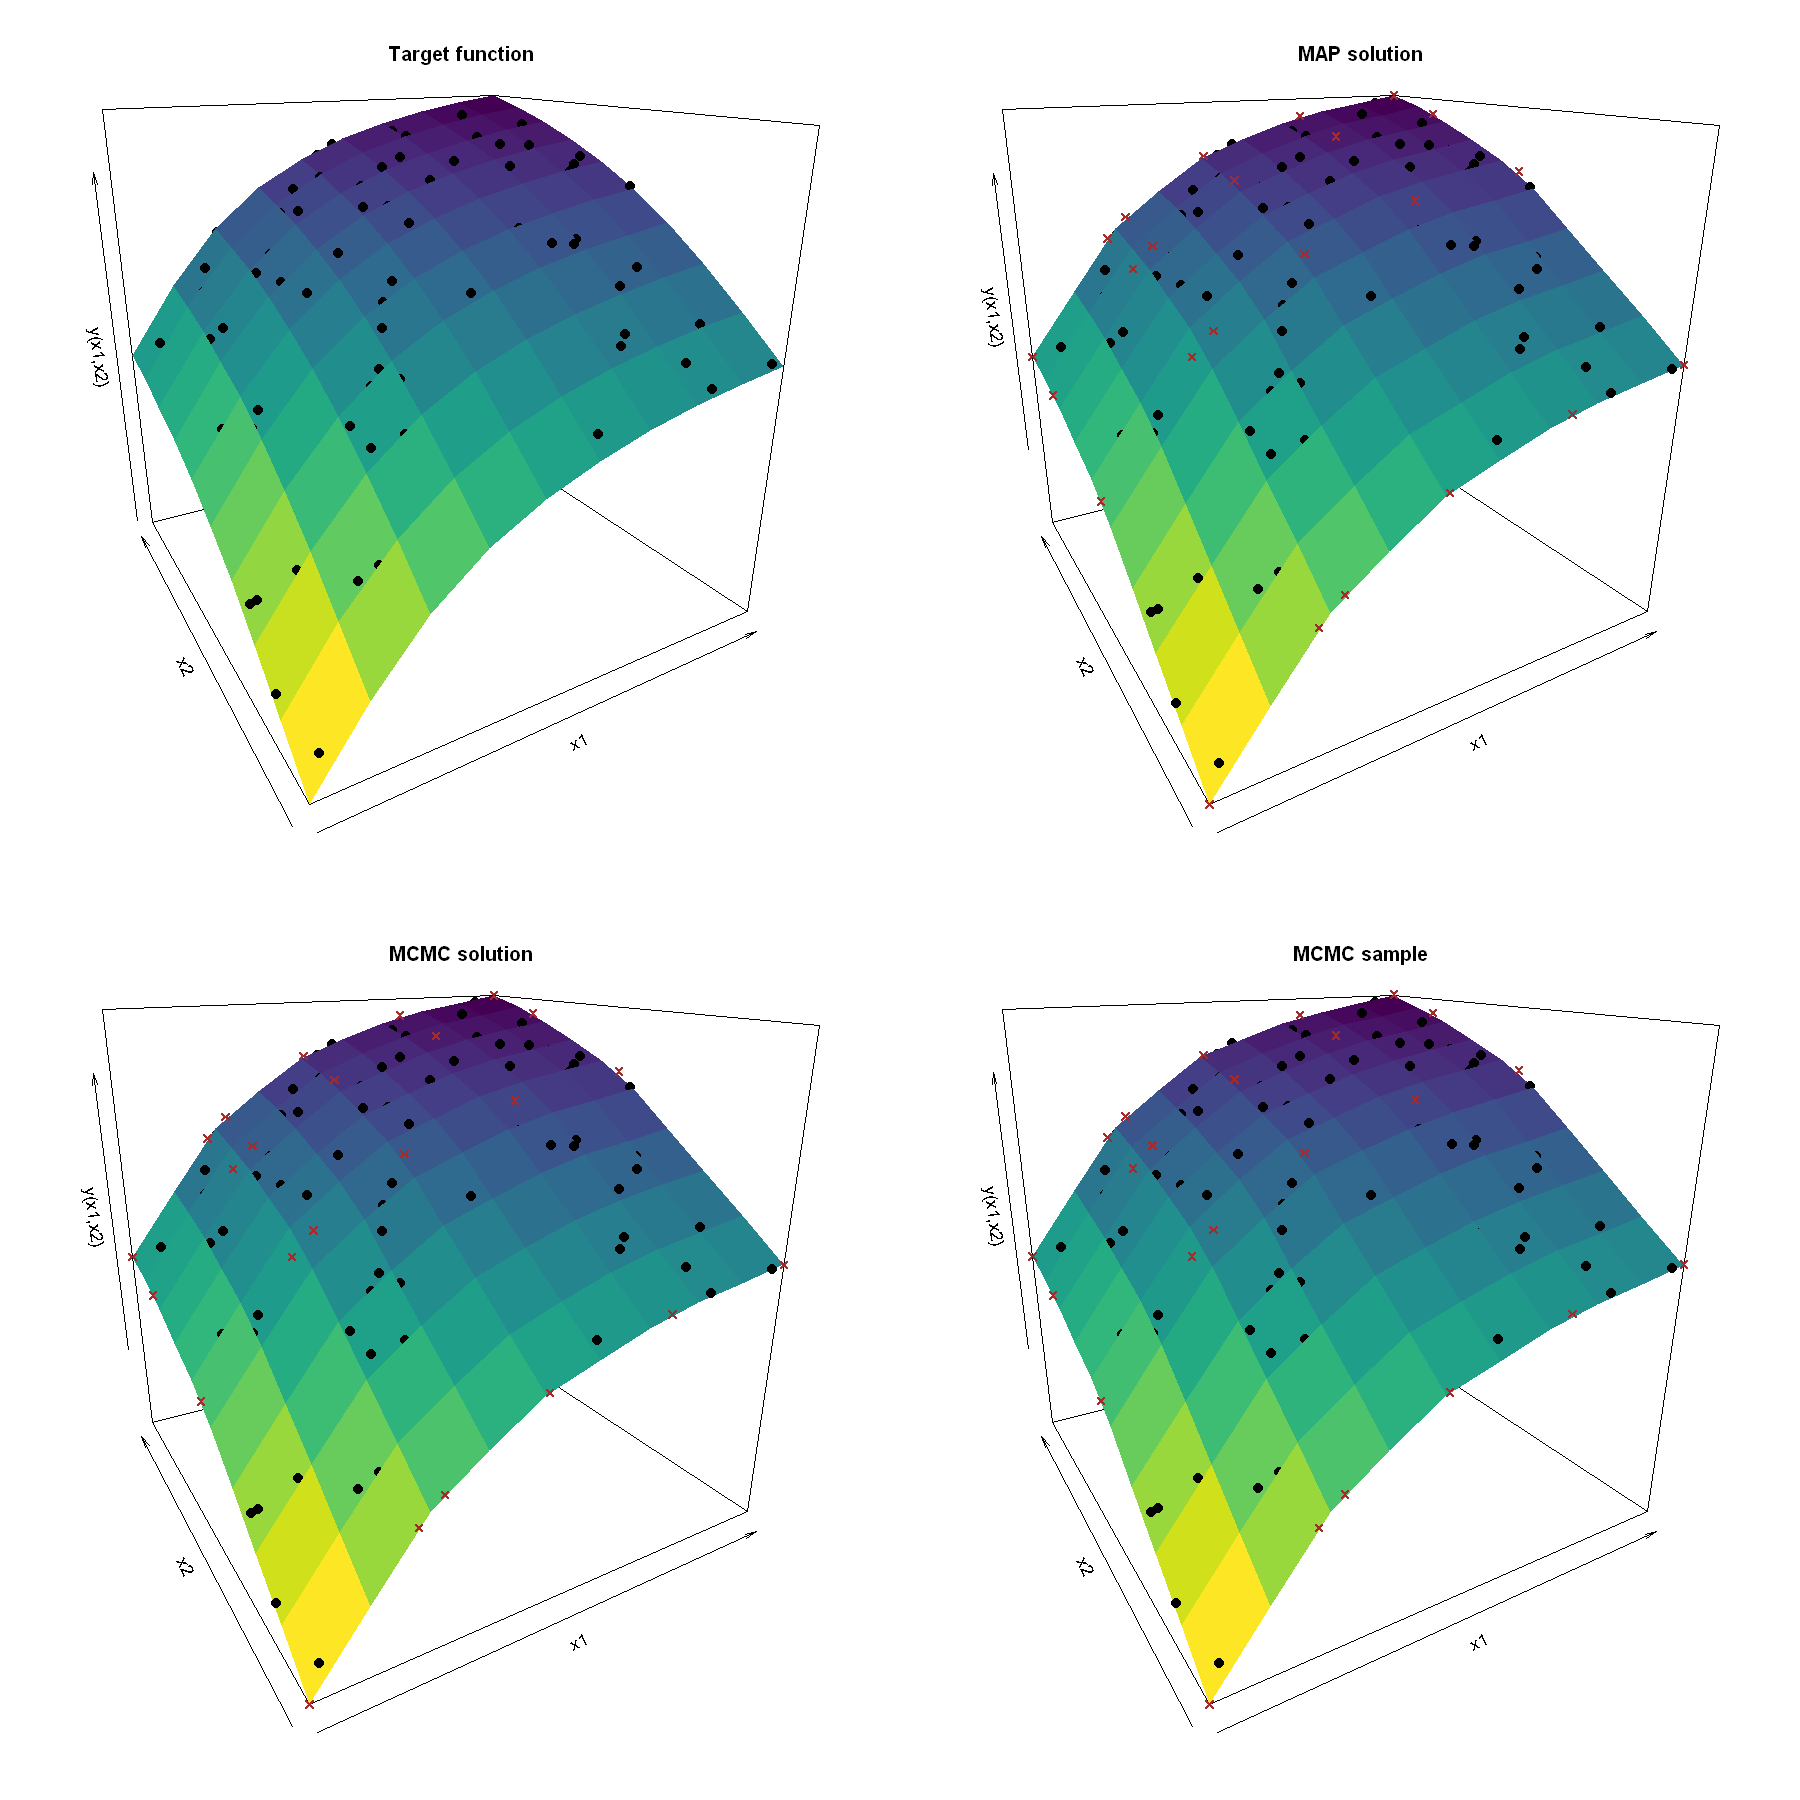

In [7]:
# plotting the MAP estimate
colormap <- rev(viridis(1e2))
options(repr.plot.width = 15, repr.plot.height = 15)
par(mfrow = c(2,2), mar=c(1.5,1.5,1.5,1))
p <- persp3D(x = unique(xtestGrid[, idxAdd[1]]), y = unique(xtestGrid[, idxAdd[2]]),
             z = matrix(targetFun(cbind(xtestGrid[, idxAdd], 1), d), ntest, ntest),
             xlab = paste("x", idxAdd[1], sep = ""), ylab = paste("x", idxAdd[2], sep = ""), zlab = "y(x1,x2)",
             main = "Target function", phi = 20, theta = -30, col = colormap, colkey = FALSE)
points3D(xdesign[,idxAdd[1]], xdesign[,idxAdd[2]], ydesign, pch = 20, cex = 2,  col = "black", add = TRUE)

p <- persp3D(x = unique(xtestGrid[, 1]), y = unique(xtestGrid[, 2]),
             z = matrix(pred$PhiAll.test %*% pred$xiAll.map, ntest, ntest),
             xlab = paste("x", idxAdd[1], sep = ""), ylab = paste("x", idxAdd[2], sep = ""), zlab = "y(x1,x2)",
             main = "MAP solution", phi = 20, theta = -30, col = colormap, colkey = FALSE)
points3D(xdesign[,idxAdd[1]], xdesign[,idxAdd[2]], ydesign, pch = 20, cex = 2,  col = "black", add = TRUE)
points(trans3D(x = u[,1], y = u[,2], z = pred_Knots$PhiAll.test %*% pred_Knots$xiAll.map, pmat = p),
       col = 'brown', pch = 4, lwd = 2)

p <- persp3D(x = unique(xtestGrid[, 1]), y = unique(xtestGrid[, 2]),
             z = matrix(rowMeans(sim.model$PhiAll.test %*% sim.model$xiAll.sim), ntest, ntest),
             xlab = paste("x", idxAdd[1], sep = ""), ylab = paste("x", idxAdd[2], sep = ""), zlab = "y(x1,x2)",
             main = "MCMC solution", phi = 20, theta = -30, col = colormap, colkey = FALSE)
points3D(xdesign[,idxAdd[1]], xdesign[,idxAdd[2]], ydesign, pch = 20, cex = 2,  col = "black", add = TRUE)
points(trans3D(x = u[,1], y = u[,2], z = pred_Knots$PhiAll.test %*% pred_Knots$xiAll.map, pmat = p),
       col = 'brown', pch = 4, lwd = 2)

p <- persp3D(x = unique(xtestGrid[, 1]), y = unique(xtestGrid[, 2]),
             z = matrix(sim.model$PhiAll.test %*% sim.model$xiAll.sim[,1], ntest, ntest),
             xlab = paste("x", idxAdd[1], sep = ""), ylab = paste("x", idxAdd[2], sep = ""), zlab = "y(x1,x2)",
             main = "MCMC sample", phi = 20, theta = -30, col = colormap, colkey = FALSE)
points3D(xdesign[,idxAdd[1]], xdesign[,idxAdd[2]], ydesign, pch = 20, cex = 2,  col = "black", add = TRUE)
points(trans3D(x = u[,1], y = u[,2], z = pred_Knots$PhiAll.test %*% pred_Knots$xiAll.map, pmat = p),
       col = 'brown', pch = 4, lwd = 2)